In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Семинар

## Предобработка данных

1. Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.
2. Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.
3. Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.
4. Исследуйте и исправьте при необходимости пропущенные значения в датасете.
5. Преобразуйте категориальные признаки в численные самым подходящим способом.

Подготовка и загрузка данных

In [2]:
training_set = pd.read_csv('titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
training_set.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Описание каждого признака

In [5]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

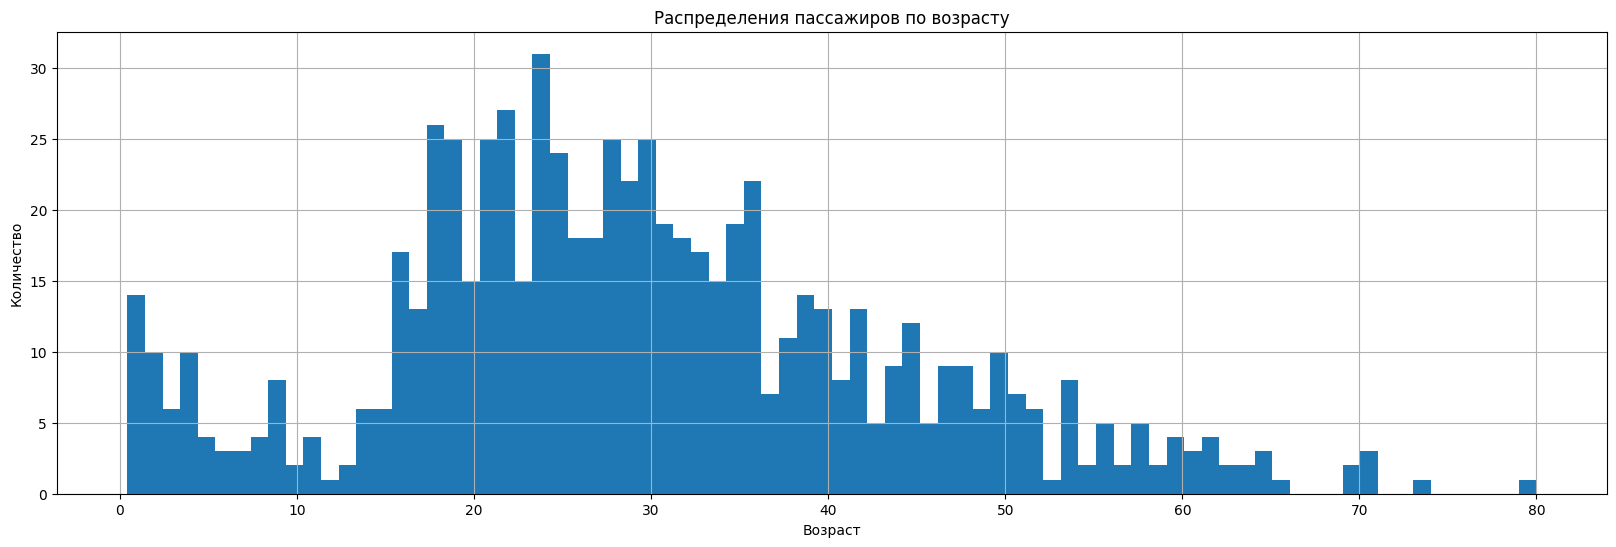

In [6]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

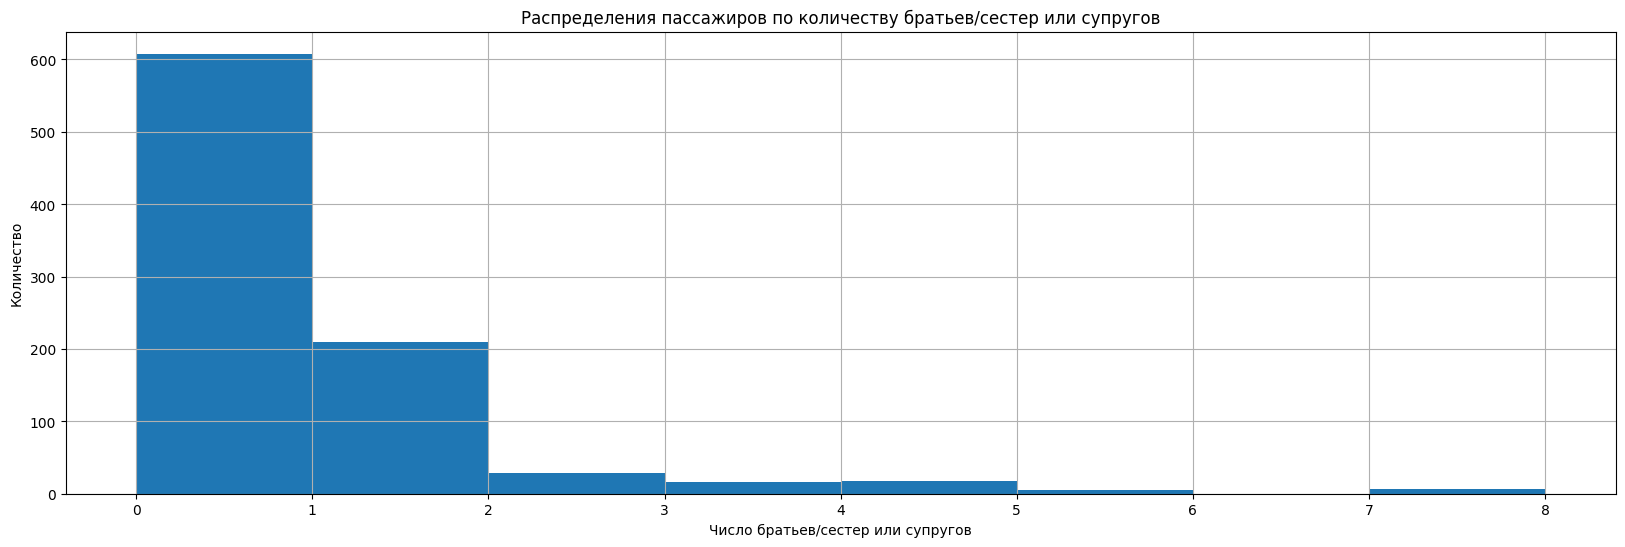

In [7]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 
  'Число братьев/сестер или супругов')

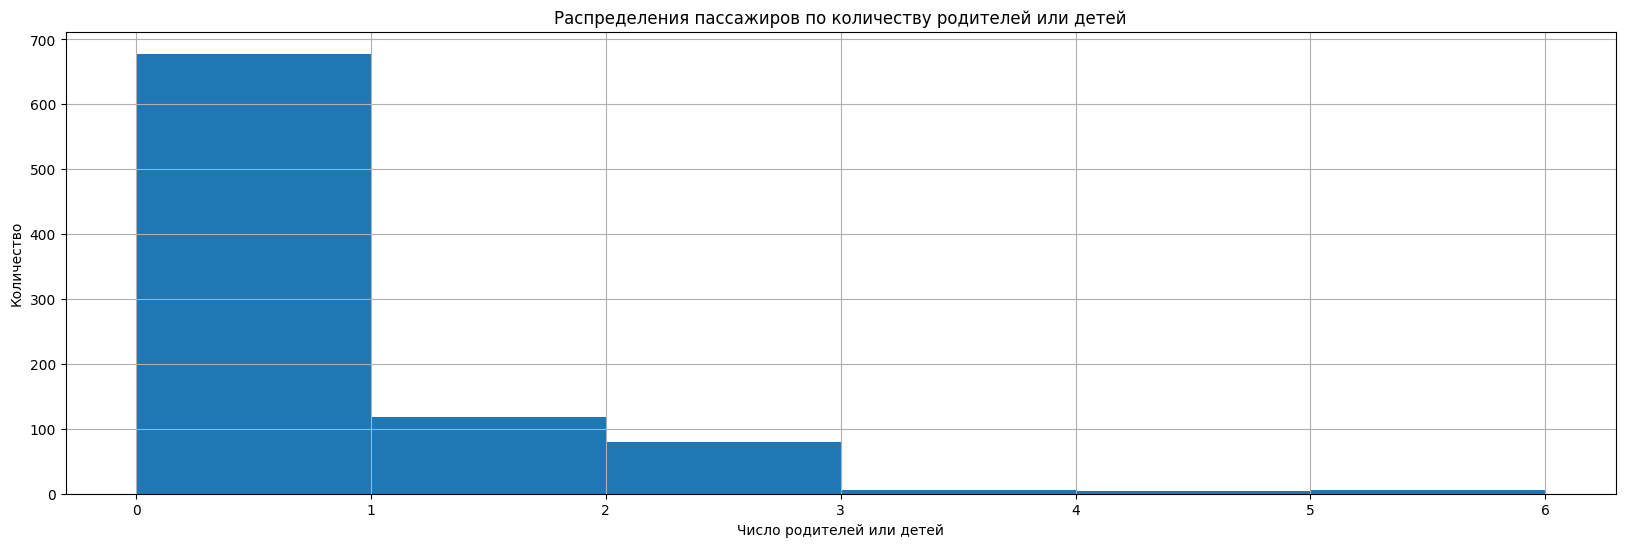

In [8]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 
  'Число родителей или детей')

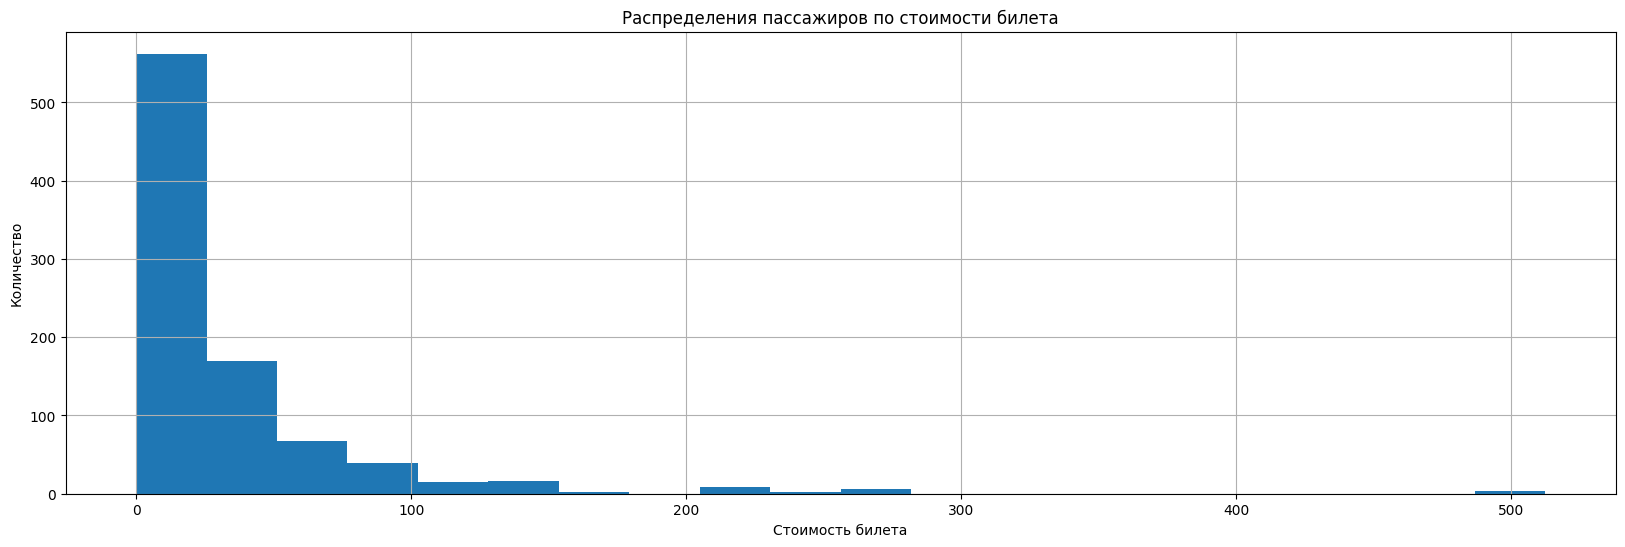

In [9]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 
  'Стоимость билета', bins=20)

<Axes: ylabel='Frequency'>

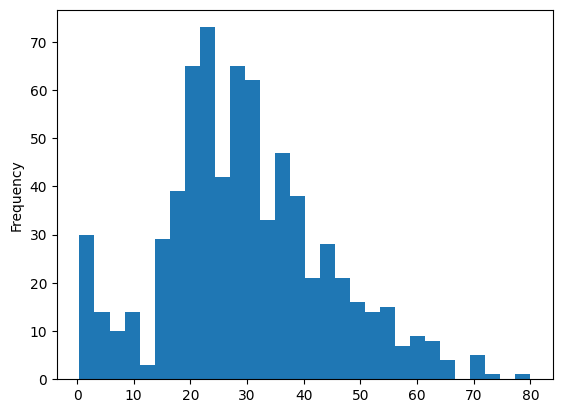

In [10]:
training_set['Age'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

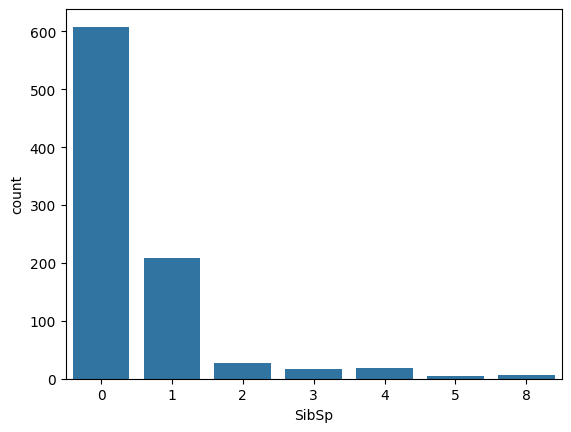

In [11]:
sns.countplot(x='SibSp', data=training_set)

In [12]:
training_set['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<Axes: >

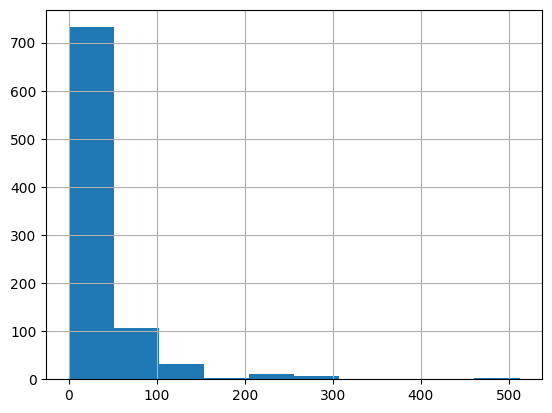

In [13]:
training_set['Fare'].hist()

<Axes: >

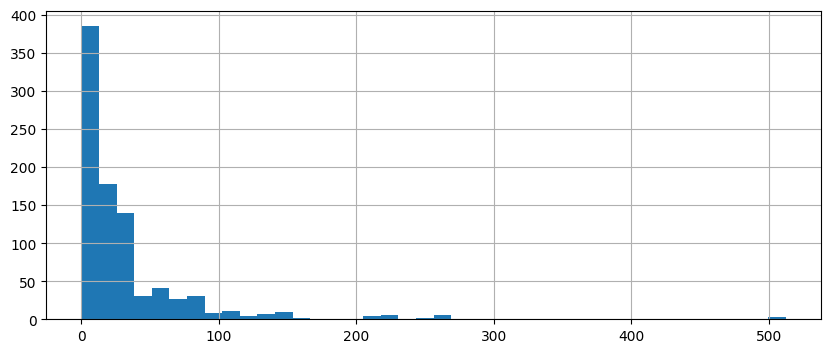

In [14]:
training_set['Fare'].hist(bins=40, figsize=(10,4))

Описание вида совместного распределения

<Axes: xlabel='Survived', ylabel='count'>

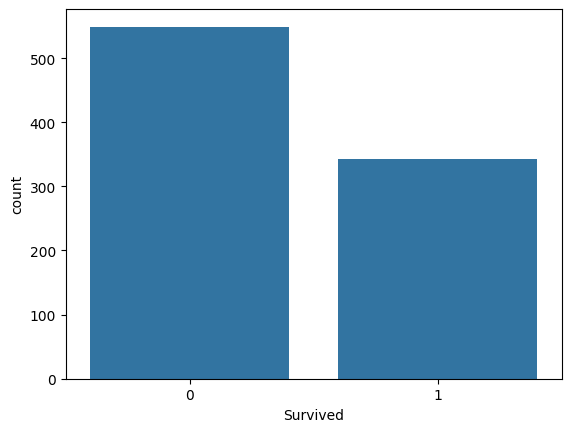

In [15]:
sns.countplot(x='Survived', data=training_set)

<Axes: xlabel='Survived', ylabel='count'>

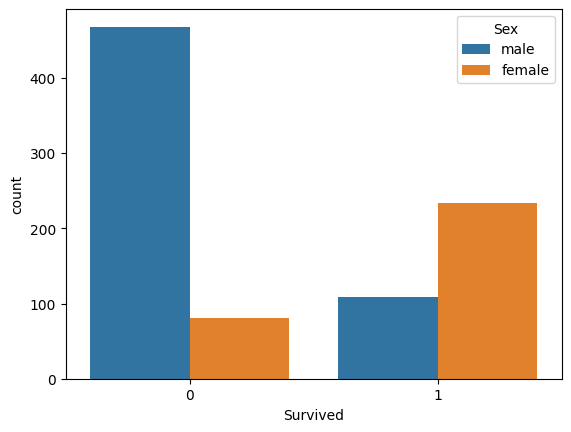

In [16]:
sns.countplot(x='Survived', data=training_set, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

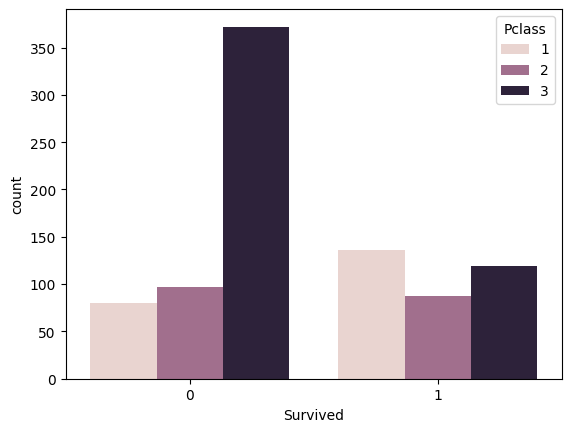

In [17]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

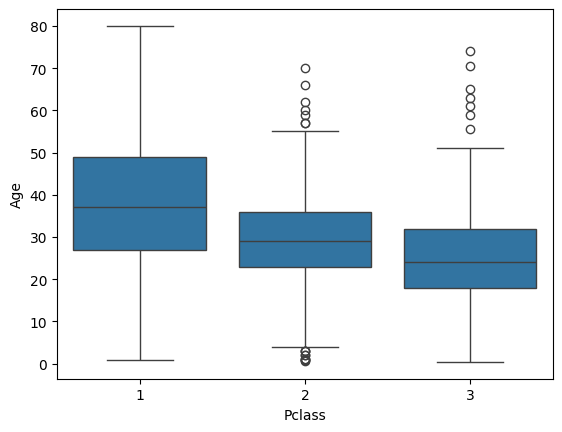

In [18]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

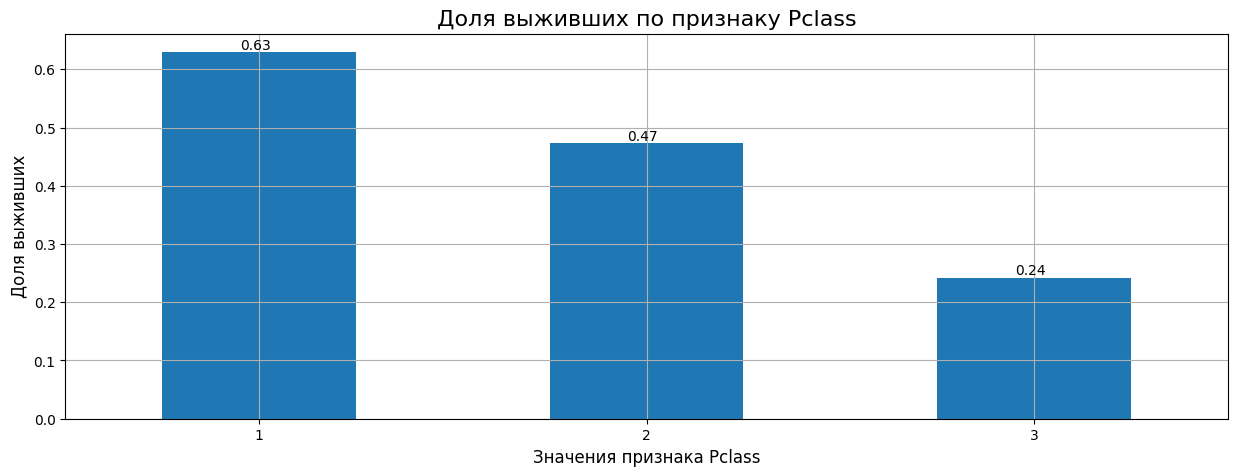

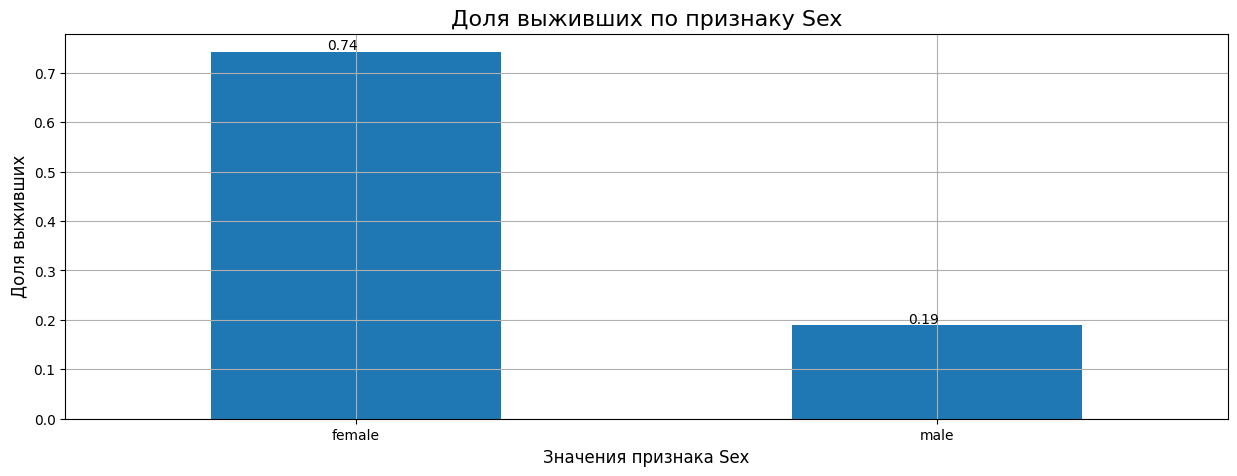

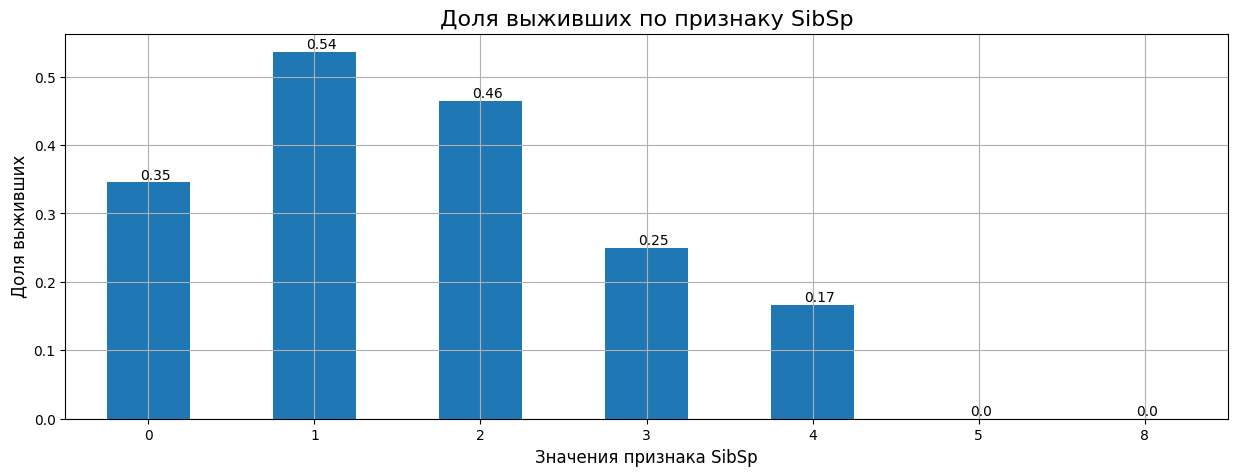

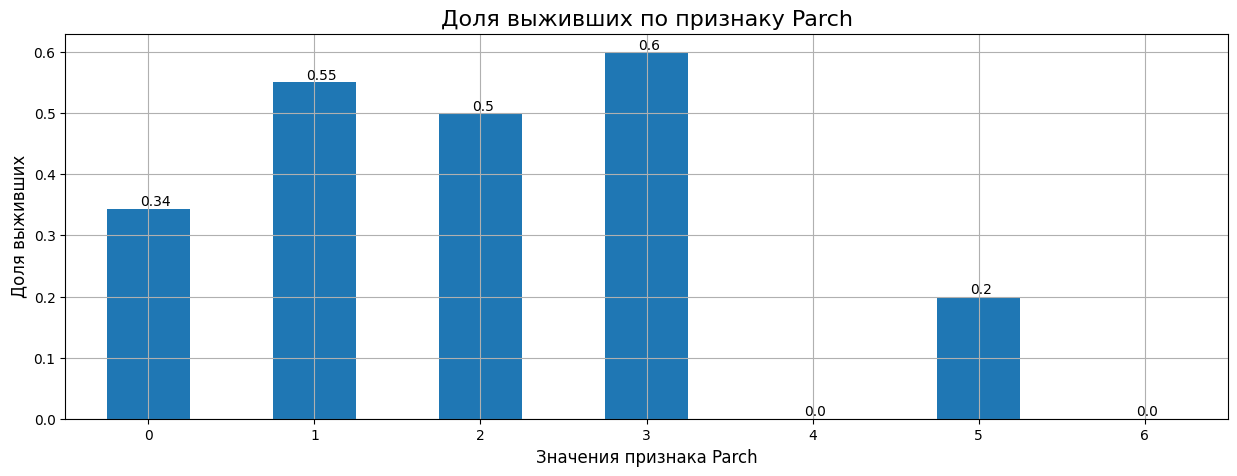

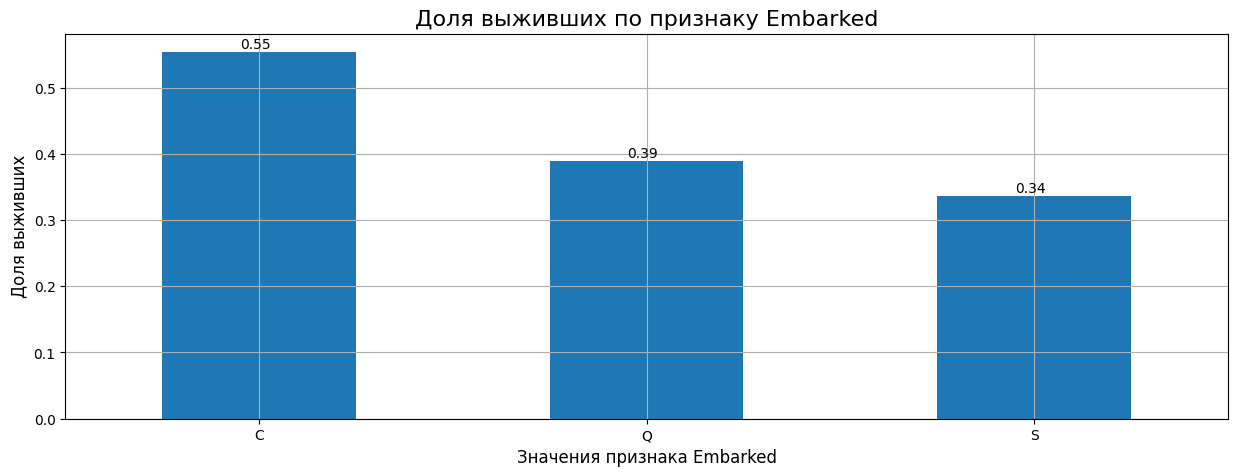

In [19]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

Исследование пропущенных значений

In [20]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Исследование отсутствующих значений

In [22]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

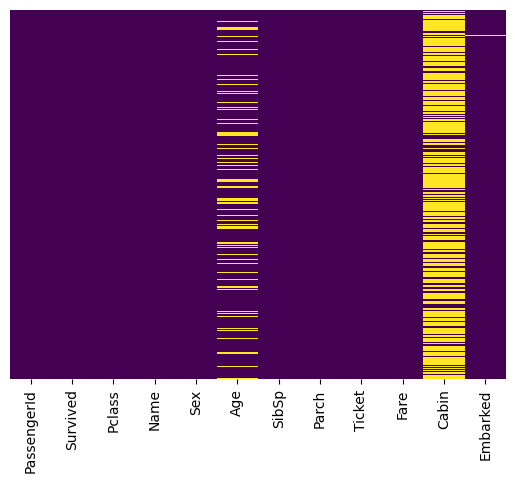

In [24]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

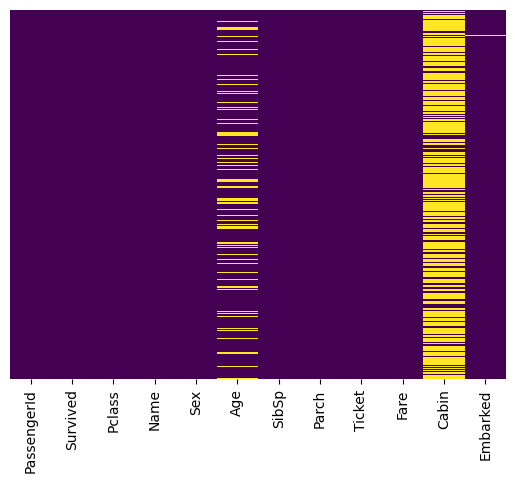

In [25]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
training_set.drop('Cabin', axis=1, inplace=True)

In [27]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

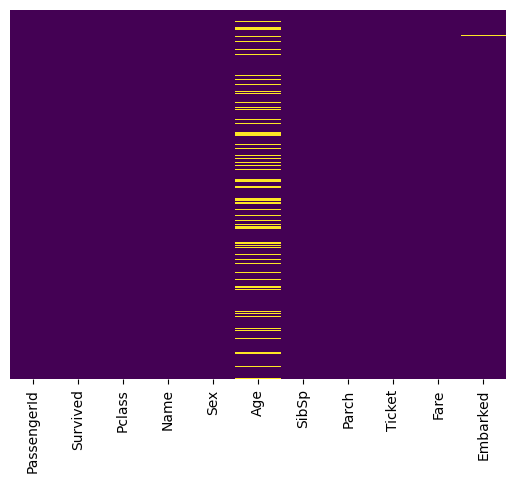

In [28]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
training_set.dropna(inplace=True)

Преобразование категориальных признаков

In [30]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

In [31]:
training_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [32]:
np.unique(cat_enc_le)  

array([0, 1])

In [33]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [34]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy 

In [35]:
training_set.shape

(712, 11)

In [36]:
cat_enc_ohe.shape

(712, 3)

In [37]:
pd.get_dummies(training_set['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [38]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [39]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [40]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [41]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [42]:
training_set = pd.concat([training_set, sex, embark], axis=1)

In [43]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [44]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [45]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# Задания для самостоятельного выполнения

##### 1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [46]:
lr = LogisticRegression()

In [47]:
X = training_set.drop(['Survived'], axis=1)
y = training_set['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [49]:
lr.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7902097902097902

##### 2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:

3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

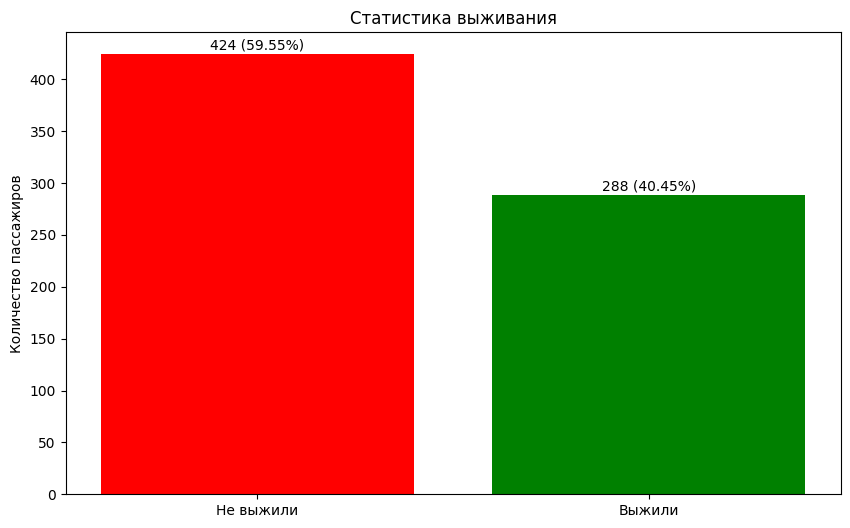

In [51]:
counts = training_set['Survived'].value_counts()
rate = counts / counts.sum()
plt.figure(figsize=(10, 6))

bars = plt.bar(['Не выжили', 'Выжили'], counts, color=['red', 'green'])
plt.ylabel('Количество пассажиров')
plt.title('Статистика выживания')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval} ({yval/sum(counts):.2%})", ha='center', va='bottom')

plt.show()

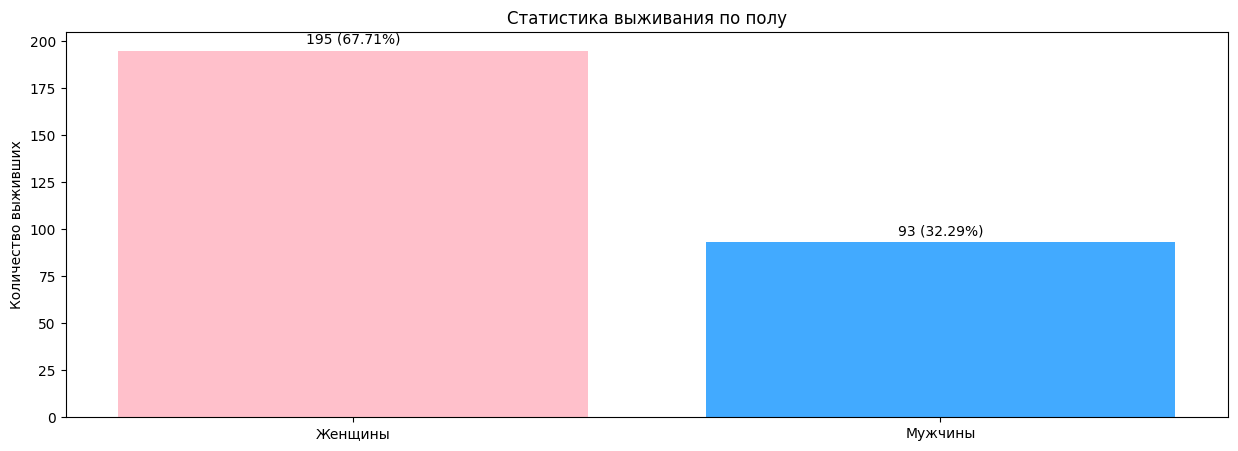

In [52]:
survived = training_set[training_set['Survived']==1]
counts_gender = survived['male'].value_counts()
rate_gender = counts_gender / counts_gender.sum()

plt.figure(figsize=(15, 5))
bars = plt.bar(['Женщины', 'Мужчины'], counts_gender, color=['pink', '#42AAFF'])
plt.ylabel('Количество выживших')
plt.title('Статистика выживания по полу')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval} ({yval/sum(counts_gender):.2%})", ha='center', va='bottom')

plt.show()

4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

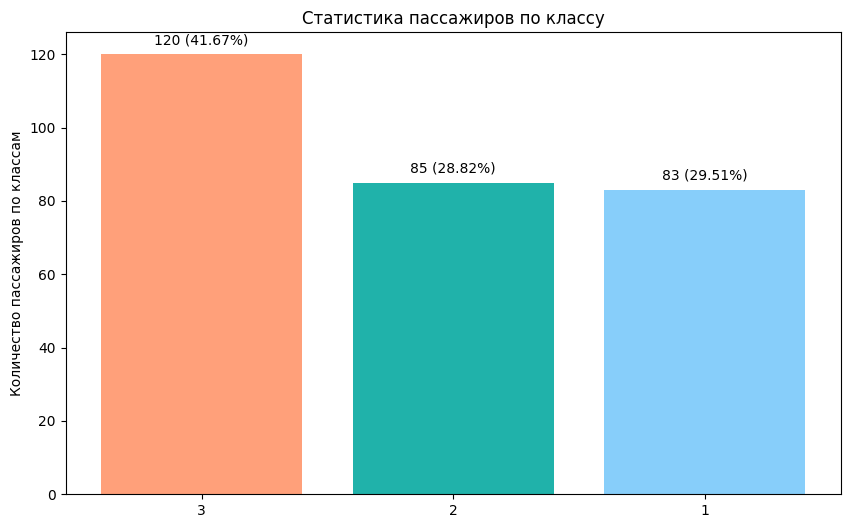

In [53]:
counts_class = survived['Pclass'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(['3', '2', '1'], counts_class, color=['#FFA07A', '#20B2AA', '#87CEFA'])
plt.ylabel('Количество пассажиров по классам')
plt.title('Статистика пассажиров по классу')

for idx, bar in enumerate(bars):
    yval = bar.get_height()
    percent = counts_class[idx+1] / sum(counts_class) * 100
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval} ({percent:.2f}%)", ha='center', va='bottom')

plt.show()

##### 5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [54]:
training_set.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

Больше удалять признаков не надо

##### 6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

In [55]:
correlation = training_set['Fare'].corr(training_set['Age'])
print(f"Корреляция между ценой за билет и возрастом: {round(correlation, 5)}")

Корреляция между ценой за билет и возрастом: 0.09314


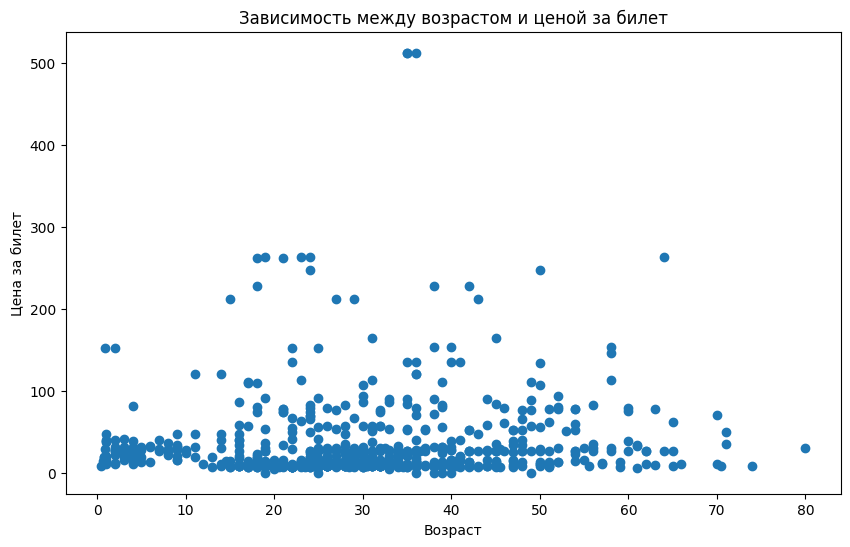

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(training_set['Age'], training_set['Fare'])
plt.xlabel('Возраст')
plt.ylabel('Цена за билет')
plt.title('Зависимость между возрастом и ценой за билет')
plt.show()

##### 7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [57]:
fare_survival = training_set.groupby('Survived')['Fare'].mean()
print(fare_survival)

Survived
0    22.965456
1    51.647672
Name: Fare, dtype: float64


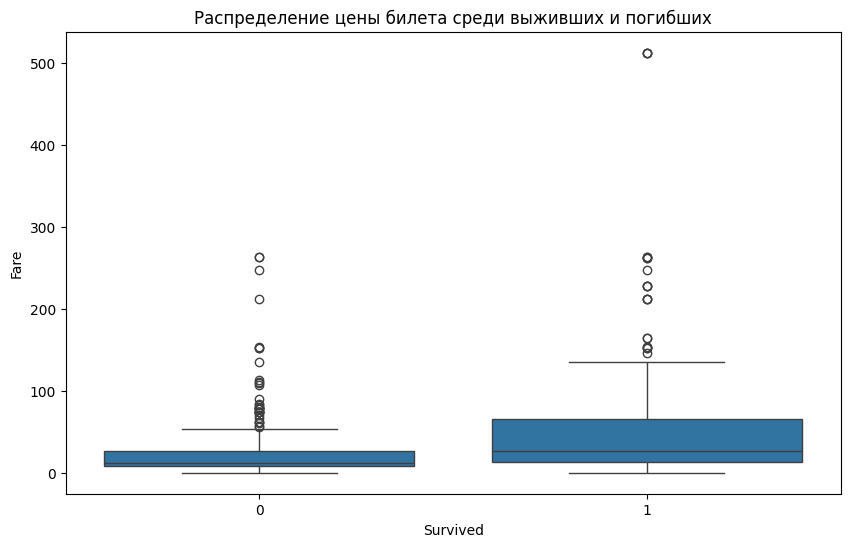

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Survived", y="Fare", data=training_set)
plt.title('Распределение цены билета среди выживших и погибших')
plt.show()

In [59]:
survival_class = training_set.groupby('Pclass')['Survived'].mean()
print(survival_class)

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64


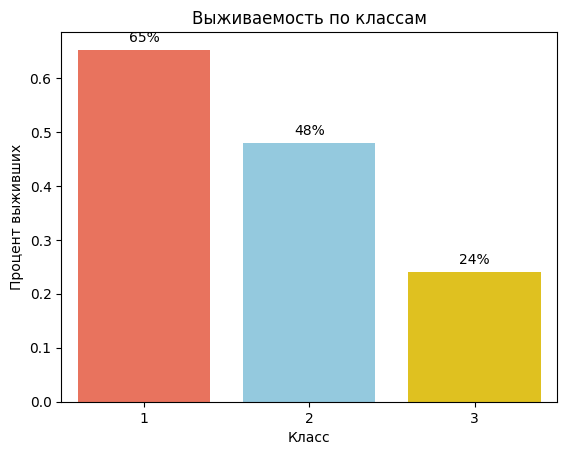

In [61]:
sns.barplot(x=survival_class.index, y=survival_class.values, palette=['#FF6347', '#87CEEB', '#FFD700'])
plt.xlabel('Класс')
plt.ylabel('Процент выживших')
plt.title('Выживаемость по классам')
for idx, value in enumerate(survival_class.values):
    plt.text(idx, value + 0.01, f'{value*100:.0f}%', ha='center', va='bottom')

plt.show()

##### 8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [62]:
# Queenstown
fare_port = training_set.groupby('Q')['Fare'].mean()
print(fare_port)

Q
False    35.234563
True     18.265775
Name: Fare, dtype: float64


In [63]:
# Southampton
fare_port = training_set.groupby('S')['Fare'].mean()
print(fare_port)

S
False    59.430515
True     27.476284
Name: Fare, dtype: float64


In [64]:
# Cherbourg
training_set[(training_set['Q'] == False) & (training_set['S'] == False)]['Fare'].mean()

68.29676692307693

In [65]:
training_set['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [66]:
training_set[training_set['S']]['Fare'].describe()

count    554.000000
mean      27.476284
std       36.546362
min        0.000000
25%        8.050000
50%       13.000000
75%       27.862500
max      263.000000
Name: Fare, dtype: float64

##### 9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

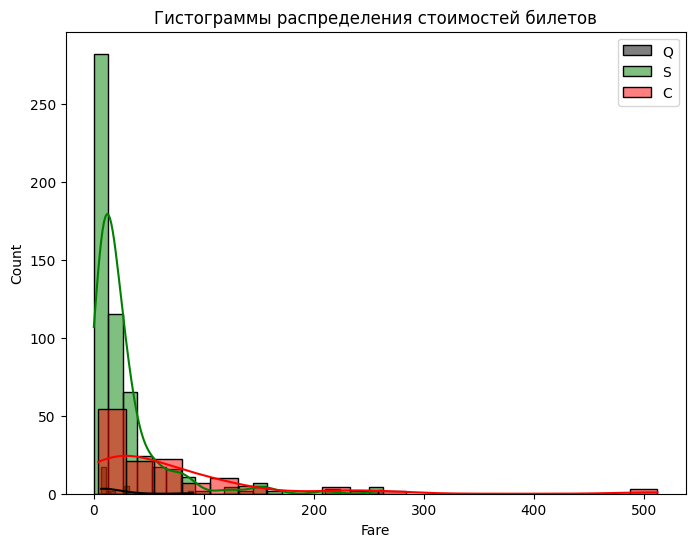

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(training_set[training_set['Q']]['Fare'], bins=20, kde=True, color='black', label='Q')
sns.histplot(training_set[training_set['S']]['Fare'], bins=20, kde=True, color='green', label='S')
sns.histplot(training_set[(training_set['Q'] == False) & (training_set['S'] == False)]['Fare'], bins=20, kde=True, color='red', label='C')

plt.legend()
plt.title('Гистограммы распределения стоимостей билетов')
plt.show()

##### 10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

На Титанике находилось 3320 человек:\
735 - пассажиров 1-го класса;\
674 - пассажира 2-го класса;\
1026 - пассажиров 3-го класса;\
885 - членов экипажа.\
Выжило 1817 человек.

In [68]:
total = 3320
total_survived = 1817

proportion = training_set.shape[0]/total
survived_propotion = len(training_set[training_set['Survived']==1])/total_survived

print(f'''Всего в выборке представлена {round(proportion, 3)} доля от общего количества,
в которой представлена {round(survived_propotion, 3)} доля выживших''')

Всего в выборке представлена 0.214 доля от общего количества,
в которой представлена 0.159 доля выживших


Выборка нерепрезентативна, т.к. содержит мало информации.

##### 11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

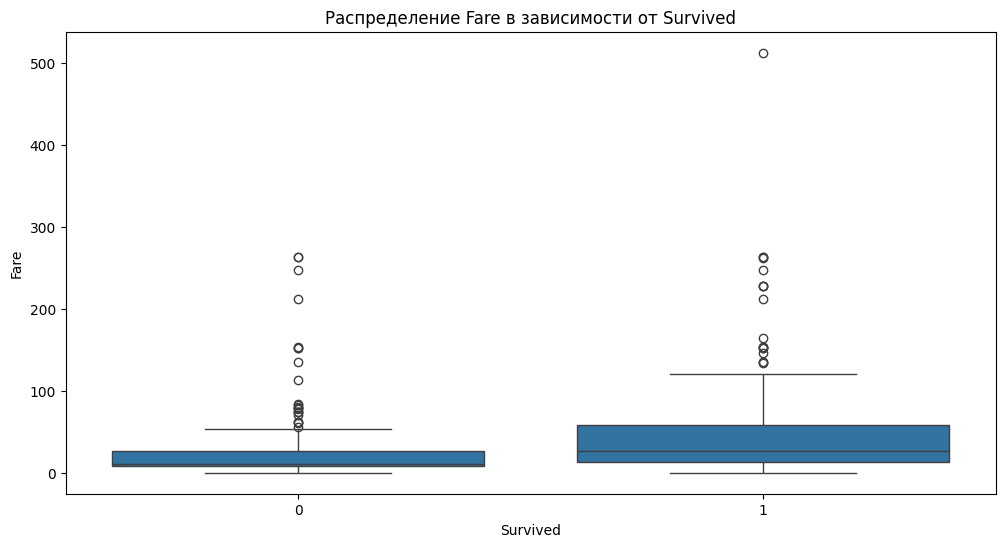

In [69]:
plt.figure(figsize=(12,6))
sns.boxplot(x=y_train, y=X_train['Fare'])
plt.title('Распределение Fare в зависимости от Survived')
plt.show()

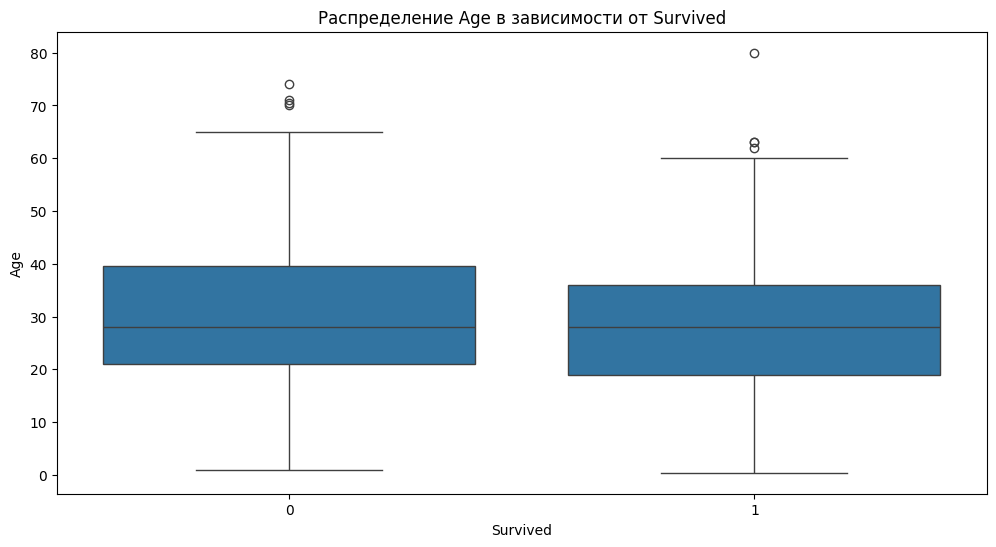

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(x=y_train, y=X_train['Age'])
plt.title('Распределение Age в зависимости от Survived')
plt.show()

##### 12. Сбалансируйте классы в исходном датасете двумя способами:

In [71]:
training_set['Survived'].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

12.1 Удалите лишние объекты мажоритарного класса (выбранные случайно)

In [72]:
non_survived_rows = training_set.index[training_set['Survived'] == 0].tolist()

In [73]:
random_set = training_set.drop(random.sample(non_survived_rows, 130), axis=0)

In [74]:
random_set.shape

(582, 9)

In [75]:
random_set['Survived'].value_counts()

Survived
0    294
1    288
Name: count, dtype: int64

12.2 Добавьте в выборку дубликаты миноритарного класса.

In [76]:
survived_rows = training_set.index[training_set['Survived'] == 1].tolist()
random_survived_set = random.sample(survived_rows, 80)

In [77]:
rows = training_set.loc[random_survived_set]
rows

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
11,1,1,58.0,0,0,26.5500,False,False,True
443,1,2,28.0,0,0,13.0000,False,False,True
472,1,2,33.0,1,2,27.7500,False,False,True
22,1,3,15.0,0,0,8.0292,False,True,False
369,1,1,24.0,0,0,69.3000,False,False,False
...,...,...,...,...,...,...,...,...,...
394,1,3,24.0,0,2,16.7000,False,False,True
291,1,1,19.0,1,0,91.0792,False,False,False
553,1,3,22.0,0,0,7.2250,True,False,False
84,1,2,17.0,0,0,10.5000,False,False,True


In [78]:
duplicated_set = pd.concat([training_set, rows])
duplicated_set['Survived'].value_counts()

Survived
0    424
1    368
Name: count, dtype: int64

##### 13. Проведите исследование эффективности простой модели классификации до и после данных преобразований.

In [79]:
X_rnd_s = random_set.iloc[:,1:]
y_rnd_s = random_set.iloc[:,0]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_rnd_s,
                                                    y_rnd_s, 
                                                    test_size=0.2,
                                                   random_state=42)

In [81]:
lr = LogisticRegression().fit(X_train, y_train)
lr

LogisticRegression()

In [86]:
y_pred = lr.predict(X_test)
print('accuracy =', round(accuracy_score(y_test, y_pred), 2))
print('f1 =', round(f1_score(y_test, y_pred), 2))
print('recall =', round(recall_score(y_test, y_pred), 2))
print('precision =', round(precision_score(y_test, y_pred), 2))

accuracy = 0.82
f1 = 0.82
recall = 0.88
precision = 0.78


In [87]:
X_dubl_s = duplicated_set.iloc[:,1:]
y_dubl_s = duplicated_set.iloc[:,0]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_dubl_s,
                                                    y_dubl_s,
                                                    test_size=0.2,
                                                   random_state=42)

In [89]:
lr = LogisticRegression().fit(X_train, y_train)
lr

LogisticRegression()

In [90]:
y_pred = lr.predict(X_test)

print('accuracy =', round(accuracy_score(y_test, y_pred), 2))
print('f1 =', round(f1_score(y_test, y_pred), 2))
print('recall =', round(recall_score(y_test, y_pred), 2))
print('precision =', round(precision_score(y_test, y_pred), 2))

accuracy = 0.82
f1 = 0.82
recall = 0.88
precision = 0.78


##### 14. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

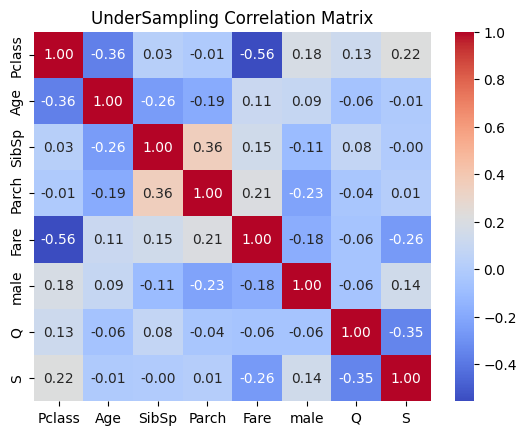

In [91]:
sns.heatmap(X_rnd_s.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('UnderSampling Correlation Matrix')
plt.show()

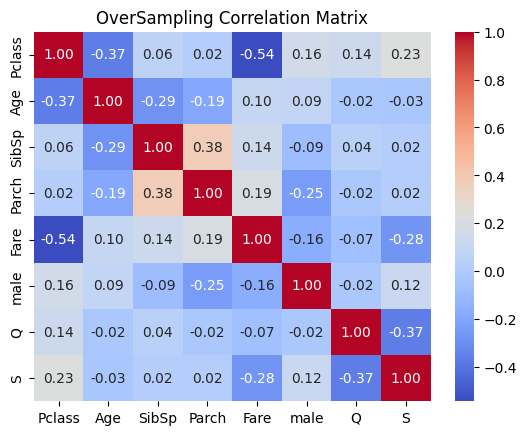

In [92]:
sns.heatmap(X_dubl_s.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('OverSampling Correlation Matrix')
plt.show()

##### 15. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

In [93]:
age_bins = [0, 18, 60, training_set['Age'].max()]
age_labels = ["Ребенок", "Взрослый", "Старик"]

training_set['Age_Category'] = pd.cut(training_set['Age'], bins=age_bins, labels=age_labels, right=False)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Age_Category
0,0,3,22.0,1,0,7.2500,True,False,True,Взрослый
1,1,1,38.0,1,0,71.2833,False,False,False,Взрослый
2,1,3,26.0,0,0,7.9250,False,False,True,Взрослый
3,1,1,35.0,1,0,53.1000,False,False,True,Взрослый
4,0,3,35.0,0,0,8.0500,True,False,True,Взрослый


In [94]:
Age_Category = pd.get_dummies(training_set['Age_Category'], drop_first=True)
training_set.drop('Age_Category', axis=1, inplace=True)

In [95]:
training_set = pd.concat([training_set, Age_Category], axis=1)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Взрослый,Старик
0,0,3,22.0,1,0,7.2500,True,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,0,3,35.0,0,0,8.0500,True,False,True,True,False


In [96]:
X, y = training_set.drop('Survived', axis=1), training_set['Survived']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
lr = LogisticRegression().fit(X_train, y_train)
lr

LogisticRegression()

In [99]:
y_pred = lr.predict(X_test)
print('accuracy =', round(accuracy_score(y_test, y_pred), 2))
print('f1 =', round(f1_score(y_test, y_pred), 2))
print('recall =', round(recall_score(y_test, y_pred), 2))
print('precision =', round(precision_score(y_test, y_pred), 2))

accuracy = 0.85
f1 = 0.79
recall = 0.82
precision = 0.76
